In [1]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error,r2_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import metrics
import math
import copy

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools 
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv("Weather_1948-2017.csv")
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
lbe = LabelEncoder()
df["New_Rain"] = lbe.fit_transform(df["RAIN"])

In [5]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN,New_Rain
0,1948-01-01,0.47,51,42,True,1
1,1948-01-02,0.59,45,36,True,1
2,1948-01-03,0.42,45,35,True,1
3,1948-01-04,0.31,45,34,True,1
4,1948-01-05,0.17,45,32,True,1


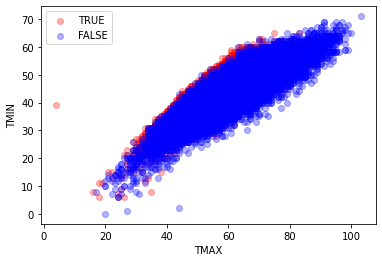

In [6]:
t = df[df.RAIN == True]
f = df[df.RAIN == False]

plt.figure(1)
plt.scatter(t.TMAX,t.TMIN,color = "red",label="TRUE",alpha =0.3)
plt.scatter(f.TMAX,f.TMIN,color = "blue",label="FALSE",alpha =0.3)

plt.xlabel("TMAX")
plt.ylabel("TMIN")
plt.legend()
plt.show()

In [7]:
y = df["New_Rain"]
X = df.drop(['DATE','RAIN','New_Rain','PRCP'],axis=1)

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: New_Rain, dtype: int32

In [9]:
X.head()

,TMAX,TMIN
0,51,42
1,45,36
2,45,35
3,45,34
4,45,32


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [11]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [12]:
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
y_pred = knn_model.predict(X_test)

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

In [ ]:
plot_confusion_matrix(cm = metrics.confusion_matrix(y_test,y_pred), normalize= True, target_names = ['Rain','No Rain'], title = "Confusion Matrix Decision Tree")

In [14]:
#ilkel score
accuracy_score(y_test, y_pred)

0.7391984971822166

In [15]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": np.arange(1,50)}

In [16]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [17]:
knn_cv_model.best_score_

0.7617279140706763

In [18]:
knn_cv_model.best_params_

{'n_neighbors': 48}

In [19]:
#final model
knn_tuned = KNeighborsClassifier(n_neighbors=48).fit(X_train,y_train)

In [20]:
y_pred = knn_tuned.predict(X_test)

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

In [ ]:
plot_confusion_matrix(cm = metrics.confusion_matrix(y_test,y_pred), normalize= True, target_names = ['Rain','No Rain'], title = "Confusion Matrix Decision Tree")

In [21]:
accuracy_score(y_test, y_pred)

0.76111458985598